<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/Credit_card_fraud_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ["Normal", "Fraud"]


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Reading the dataset 
data=pd.read_csv("/content/drive/MyDrive/AML-Assignments/DataSet/Credit_CARD_Fraud/creditcard.csv")

In [16]:
# viewing the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#About the data: 
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [17]:
# Gathering further info on the data set

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# checking for Null values 
data.isnull().values.any()


False

There is no null values 

Text(0, 0.5, 'Frequency')

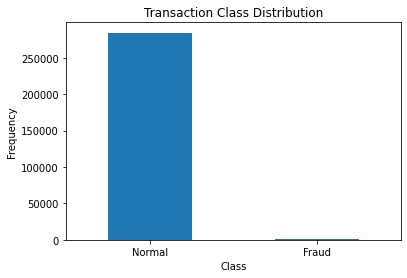

In [19]:
# let us plot the bar plot of the class variable or targets variable:

count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

# The data set is severely imbalanced. There are ways to handle the imbalanced data using upsampling or down sampling.
Our regular machine learning algorithims needs mechanisim to handle imbalanced data.
But there are algorithim like Isolation forest and Local outlier factor algorithims which can handle imbalanced data and mostly designed to perform outlier detections.

# # Logistic Regression can be imapcted by imbalance data: 
In order to fit logistic regression, we are going to up-sample the data.
First we will get the counts of the individual classses 



In [20]:
data_frame_normal=data[data['Class']==0]
#datat_frame_fraud = data[data['class']==1]


In [21]:
data_frame_normal.shape

(284315, 31)

In [22]:
data_frame_fraud=data[data['Class']==1]

NameError: ignored

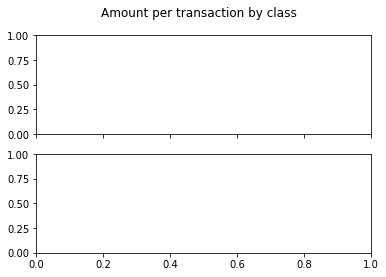

In [24]:
# Ploting the distribution of the amout of Fraud and normal 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [ ]:
data_frame_fraud.shape

# As logistic regression is imapcted by imbalanced data, upsampling the minority class to 28k data points will create a huge data set. In such cases, algorithims like LOC and isolation forest can take care the imbalnce dataset and the better choice for this kind of problems.
In order to apply and get optimum result, Going to take the Normal 5000 point and upsample my minority class to 5000 points.


In [ ]:
# https://elitedatascience.com/imbalanced-classes: Reference 	
from sklearn.utils import resample

data_frame_fraud_upsampling = resample(data_frame_fraud, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=123) 

print(data_frame_fraud_upsampling.shape)

In [ ]:
# Down sampling the normal data points 

data_frame_normal_downsample = data_frame_normal.sample(frac =.01,random_state=123)

In [ ]:
data_frame_normal_downsample.shape

In [ ]:
# Forming new data set with smaller data points 

final_dataset=pd.concat([data_frame_fraud_upsampling,data_frame_normal_downsample])

In [ ]:
final_dataset.shape

In [ ]:
final_dataset['Class'].value_counts()

In [ ]:
# Creating the dependent variable and target:

final_dataset.head()

In [ ]:
final_dataset.shape

In [ ]:
x=final_dataset.iloc[:,:30]

In [ ]:
x.head()

In [ ]:
x.shape

In [ ]:
y=final_dataset.iloc[: ,30]
y.head()



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
# Preparing the data for normalzation 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [ ]:
# Training the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tuned_parameters=[{'c' :[1,10]}]

model= GridSearchCV(LogisticRegression(),tuned_parameters,scoring='accuracy',cv=5)
model.fit(x_train,y_train)

print(model.best_estimator_)
print(model.accuracy_score(x_test,y_test))
print(model.confusion_matrix(x_test,y_test))



In [ ]:
from sklearn.linear_model import LogisticRegression
>>> from sklearn.model_selection import RandomizedSearchCV
>>> from scipy.stats import uniform
>>> iris = load_iris()
>>> logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
...                               random_state=0)
>>> distributions = dict(C=uniform(loc=0, scale=4),
...                      penalty=['l2', 'l1'])
>>> clf = RandomizedSearchCV(logistic, distributions, random_state=0)
>>> search = clf.fit(iris.data, iris.target)
>>> search.best_params_
{'C': 2..., 'penalty': 'l1'}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import f1_score

logistic = LogisticRegression(solver='saga',tol=1e-2,max_iter=200,random_state=123)
distributions= dict(C=uniform(loc=0,scale=4),penalty=['l2','l1'])
clf = RandomizedSearchCV(logistic,distributions,scoring = 'accuracy',cv=10,verbose=1,random_state=123)
search = clf.fit(x_train,y_train)
best_model=search.best_params_
print(best_model)


In [ ]:
search.best_score_

In [ ]:
prediction=search.predict(x_test)

In [ ]:
from sklearn import metrics
print('accuracy:', metrics.accuracy_score(y_test, prediction))
print('confusion_matrix:', metrics.confusion_matrix(y_test, prediction))
